# 4.2 pandas

## 4.2.1 pandasの概要

### pandasとは
* Numpyを基盤とするライブラリ
* シリーズ（Series）とデータフレーム（DataFrame）のデータ型を提供

In [1]:
import pandas as pd

### Seriesとは
* 1次元データ
* pandas.Seriesに引数を渡して生成

In [2]:
ser = pd.Series([10, 20, 30, 40])
ser

0    10
1    20
2    30
3    40
dtype: int64

### DataFrameとは
* 2次元データ
* pandas.DataFrameに引数を渡して生成

In [3]:
df = pd.DataFrame([[10, "a", True],
                 [20, "b", False],
                 [30, "c", False],
                 [40, "d", True]])
df

,0,1,2
0,10,a,True
1,20,b,False
2,30,c,False
3,40,d,True


### DataFrameの概要を見る

In [4]:
import numpy as np
df = pd.DataFrame(np.arange(100).reshape((25, 4)))

In [5]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
5,20,21,22,23
6,24,25,26,27
7,28,29,30,31
8,32,33,34,35
9,36,37,38,39


#### DataFrame.headメソッド
* DataFrameの先頭5行を出力する

In [6]:
df.head()

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


#### DataFrame.tailメソッド
* DataFrameの末尾5行を出力する

In [7]:
df.tail()

,0,1,2,3
20,80,81,82,83
21,84,85,86,87
22,88,89,90,91
23,92,93,94,95
24,96,97,98,99


#### DataFrame.shape属性
* DataFrameのサイズを取得する

In [8]:
df.shape

(25, 4)

### インデックス名、カラム名

In [9]:
df = pd.DataFrame(np.arange(6).reshape((3, 2)))

In [10]:
df

,0,1
0,0,1
1,2,3
2,4,5


*インデックス名とカラム名の設定*

In [11]:
df.index = ["01", "02", "03"]
df.columns = ["A", "B"]

In [12]:
df

,A,B
01,0,1
02,2,3
03,4,5


*DataFrame作成時にインデックス名とカラム名を指定する*

In [13]:
named_df = pd.DataFrame(np.arange(6).reshape((3, 2)),
                       columns = ["A列", "B列"],
                       index = ["1行目", "2行目", "3行目"])
named_df

,A列,B列
1行目,0,1
2行目,2,3
3行目,4,5


*辞書(dict)形式でDataFrameを作成する*

In [14]:
pd.DataFrame({"A列" : [0, 2, 4], "B列" : [1, 3, 5]})

,A列,B列
0,0,1
1,2,3
2,4,5


### データの抽出

In [15]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.arange(12).reshape((4, 3)),
                 columns = ["A", "B", "C"],
                 index = ["1行目", "2行目", "3行目", "4行目"])
df

,A,B,C
1行目,0,1,2
2行目,3,4,5
3行目,6,7,8
4行目,9,10,11


*カラム名を直接指定して抽出*

In [16]:
df["A"]

1行目    0
2行目    3
3行目    6
4行目    9
Name: A, dtype: int32

In [17]:
df[["A", "B"]]

,A,B
1行目,0,1
2行目,3,4
3行目,6,7
4行目,9,10


*インデックスを指定して抽出*

In [18]:
df[:2]

,A,B,C
1行目,0,1,2
2行目,3,4,5


#### DataFrame.locメソッド
* インデックス名、カラム名を指定してデータを抽出する
* 取得したデータはDataFrameの参照

*データをすべて抽出する*

In [19]:
df.loc[:, :]

,A,B,C
1行目,0,1,2
2行目,3,4,5
3行目,6,7,8
4行目,9,10,11


*カラムを1つ指定して抽出する*

In [20]:
df.loc[:, "A"]

1行目    0
2行目    3
3行目    6
4行目    9
Name: A, dtype: int32

*カラムを複数指定して抽出する*

In [21]:
df.loc[:, ["A", "B"]]

,A,B
1行目,0,1
2行目,3,4
3行目,6,7
4行目,9,10


*インデックスを1つ指定して抽出する*

In [22]:
df.loc["1行目", :]

A    0
B    1
C    2
Name: 1行目, dtype: int32

*インデックスを複数指定して抽出する*

In [23]:
df.loc[["1行目", "3行目"], :]

,A,B,C
1行目,0,1,2
3行目,6,7,8


*インデックスとカラムの両方を指定して抽出する*

In [24]:
df.loc[["1行目"], ["A", "C"]]

,A,C
1行目,0,2


#### DataFrame.ilocメソッド
* インデックス番号、カラム番号を指定してデータを抽出する

In [25]:
df.iloc[1, 1]

4

*インデックス：範囲、カラム：位置で指定して抽出*

In [26]:
df.iloc[1:, 1]

2行目     4
3行目     7
4行目    10
Name: B, dtype: int32

*インデックス：範囲、カラム：範囲で指定して抽出*

In [27]:
df.iloc[1:, :2]

,A,B
2行目,3,4
3行目,6,7
4行目,9,10


## 4.2.2 データの読み込み・書き込み

### データ読み込み：CSVファイル

#### pandas.read_csvメソッド
* 指定したファイルパスからCSVファイルを読み込んで、DataFrameを生成する
* encodingパラメータで読み込み時のエンコーディング形式を指定できる

In [28]:
import pandas as pd
df = pd.read_csv("data/201704health.csv", encoding = "utf-8")
df

,日付,歩数,摂取カロリー
0,2017-04-01,5439,2500
1,2017-04-02,2510,2300
2,2017-04-03,10238,1950
3,2017-04-04,8209,1850
4,2017-04-05,9434,1930
5,2017-04-06,7593,1800
6,2017-04-07,9320,1940
7,2017-04-08,4873,2300
8,2017-04-09,12045,1950
9,2017-04-10,7493,1850


### データ読み込み：Excelファイル

#### pandas.read_excelメソッド
* 指定したファイルパスからExcelファイルを読み込んで、DataFrameを生成する

In [29]:
df = pd.read_excel("data/201704health.xlsx")
df

,日付,歩数,摂取カロリー
0,2017-04-01,5439,2500
1,2017-04-02,2510,2300
2,2017-04-03,10238,1950
3,2017-04-04,8209,1850
4,2017-04-05,9434,1930
5,2017-04-06,7593,1800
6,2017-04-07,9320,1940
7,2017-04-08,4873,2300
8,2017-04-09,12045,1950
9,2017-04-10,7493,1850


### データ読み込み：WebサイトのHTMLから表を取得

#### pandas.read_htmlメソッド
* url文字列を渡して、HTML内の各table要素がDataFrameオブジェクトの要素となる配列として取得する

In [30]:
url = "https://ja.wikipedia.org/wiki/%E3%83%88%E3%83%83%E3%83%97%E3%83%AC%E3%83%99%E3%83%AB%E3%83%89%E3%83%A1%E3%82%A4%E3%83%B3%E4%B8%80%E8%A6%A7"
tables = pd.read_html(url)

*取得したTable要素の数を確認*

In [31]:
len(tables)

40

*国別コードトップレベルドメインは5番目にある*

*国別コードトップレベルドメインのDataFrameを取得*

In [32]:
df = tables[4]
df

,0,1,2,3,4,5,6,7
0,Name,Entity,Explanation,Notes,IDN,DNSSEC,SLD,IPv6
1,.ac,アセンション島,NaN,広く学術的なサイト（大学など）のために用いられる。アセンション島はイギリス領であるが、イギリ...,Yes,Yes,Yes,Yes
2,.ad,アンドラ,NaN,アンドラにおける商標または市民権が必要となる[6][7]。,NaN,Yes,Yes,NaN
3,.ae,アラブ首長国連邦,NaN,NaN,NaN,No,Yes,NaN
4,.af,アフガニスタン,NaN,NaN,NaN,Yes,Yes,NaN
5,.ag,アンティグア・バーブーダ,NaN,AGがドイツの株式会社(Aktiengesellschaft)の略称であることから、非公式に...,NaN,Yes,Yes,NaN
6,.ai,アンギラ,NaN,NaN,NaN,No,Yes,NaN
7,.al,アルバニア,NaN,かつては市民権が必要だったが、今は必要ない。,NaN,No,Yes,NaN
8,.am,アルメニア,NaN,非公式にAMラジオ局やWebラジオ局で使用されている。,No,Yes,Yes,Yes
9,.an,オランダ領アンティル,NaN,現地に在住・存在している必要がある。オランダ領アンティルは2010年10月10日に解体された。,NaN,No,Yes,NaN


### データ書き込み：CSVファイル

#### DataFrame.to_csvメソッド
* 引数で渡したファイルパスに、DataFrameをCSVファイルとして出力

In [33]:
df.to_csv("data/write_data.csv")

### データ書き込み：Excelファイル

#### DataFrame.to_excelメソッド
* 引数で渡したファイルパスに、DataFrameをExcelファイルとして出力

In [34]:
df.to_excel("data/write_excel.xlsx")

### データの再利用

pandasのデータをそのままファイルへ書き出す。

ここでは、python標準モジュールのpickleを使う。

In [35]:
df.to_pickle("data/write_df.pickle")

#### read_pickle関数
* 引数で渡したファイルパスから、pickle形式に直列化されたデータを読み込む

In [36]:
df = pd.read_pickle("data/write_df.pickle")

In [37]:
df

,0,1,2,3,4,5,6,7
0,Name,Entity,Explanation,Notes,IDN,DNSSEC,SLD,IPv6
1,.ac,アセンション島,NaN,広く学術的なサイト（大学など）のために用いられる。アセンション島はイギリス領であるが、イギリ...,Yes,Yes,Yes,Yes
2,.ad,アンドラ,NaN,アンドラにおける商標または市民権が必要となる[6][7]。,NaN,Yes,Yes,NaN
3,.ae,アラブ首長国連邦,NaN,NaN,NaN,No,Yes,NaN
4,.af,アフガニスタン,NaN,NaN,NaN,Yes,Yes,NaN
5,.ag,アンティグア・バーブーダ,NaN,AGがドイツの株式会社(Aktiengesellschaft)の略称であることから、非公式に...,NaN,Yes,Yes,NaN
6,.ai,アンギラ,NaN,NaN,NaN,No,Yes,NaN
7,.al,アルバニア,NaN,かつては市民権が必要だったが、今は必要ない。,NaN,No,Yes,NaN
8,.am,アルメニア,NaN,非公式にAMラジオ局やWebラジオ局で使用されている。,No,Yes,Yes,Yes
9,.an,オランダ領アンティル,NaN,現地に在住・存在している必要がある。オランダ領アンティルは2010年10月10日に解体された。,NaN,No,Yes,NaN


## 4.2.3 データの整形

### 使用するデータの読み込み

In [38]:
df = pd.read_excel("data/201704health.xlsx")
df

,日付,歩数,摂取カロリー
0,2017-04-01,5439,2500
1,2017-04-02,2510,2300
2,2017-04-03,10238,1950
3,2017-04-04,8209,1850
4,2017-04-05,9434,1930
5,2017-04-06,7593,1800
6,2017-04-07,9320,1940
7,2017-04-08,4873,2300
8,2017-04-09,12045,1950
9,2017-04-10,7493,1850


### 条件で抽出

10000歩以上の日のみを抽出する

In [39]:
df["歩数"] >= 10000

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: 歩数, dtype: bool

*bool型のSeriesが戻る*

DataFrameに当てはめて、Trueの行のみを抽出する

In [40]:
df_selected = df[df["歩数"] >= 10000]
df_selected

,日付,歩数,摂取カロリー
2,2017-04-03,10238,1950
8,2017-04-09,12045,1950
12,2017-04-13,10287,1800
19,2017-04-20,15328,1800
20,2017-04-21,12849,1940


歩数と行数を確認

In [41]:
df_selected.shape

(5, 3)

#### DataFrame.queryメソッド
* 引数で渡したクエリー構文を用いて、DataFrameを抽出する

In [42]:
df.query('歩数 >= 10000 and 摂取カロリー <= 1800')

,日付,歩数,摂取カロリー
12,2017-04-13,10287,1800
19,2017-04-20,15328,1800


### データ型変換

In [43]:
df.dtypes

日付        object
歩数         int64
摂取カロリー     int64
dtype: object

#### applyメソッド
* 第1引数で渡した処理を、配列のデータ全てに順次実行した結果を取得する

#### pandas.to_datetime関数
* 引数で渡された値を日付型に変換する

In [44]:
df.loc[:, 'date'] = df.loc[:, '日付'].apply(pd.to_datetime)

In [45]:
df.loc[:, 'date']

0    2017-04-01
1    2017-04-02
2    2017-04-03
3    2017-04-04
4    2017-04-05
5    2017-04-06
6    2017-04-07
7    2017-04-08
8    2017-04-09
9    2017-04-10
10   2017-04-11
11   2017-04-12
12   2017-04-13
13   2017-04-14
14   2017-04-15
15   2017-04-16
16   2017-04-17
17   2017-04-18
18   2017-04-19
19   2017-04-20
20   2017-04-21
21   2017-04-22
22   2017-04-23
23   2017-04-24
24   2017-04-25
25   2017-04-26
26   2017-04-27
27   2017-04-28
28   2017-04-29
29   2017-04-30
Name: date, dtype: datetime64[ns]

In [46]:
df.loc[:, '日付'].apply(pd.to_datetime)

0    2017-04-01
1    2017-04-02
2    2017-04-03
3    2017-04-04
4    2017-04-05
5    2017-04-06
6    2017-04-07
7    2017-04-08
8    2017-04-09
9    2017-04-10
10   2017-04-11
11   2017-04-12
12   2017-04-13
13   2017-04-14
14   2017-04-15
15   2017-04-16
16   2017-04-17
17   2017-04-18
18   2017-04-19
19   2017-04-20
20   2017-04-21
21   2017-04-22
22   2017-04-23
23   2017-04-24
24   2017-04-25
25   2017-04-26
26   2017-04-27
27   2017-04-28
28   2017-04-29
29   2017-04-30
Name: 日付, dtype: datetime64[ns]

#### astypeメソッド
* 配列の各データを第1引数で渡した型に変換する

In [47]:
df.loc[:, '摂取カロリー'] = df.loc[:, '摂取カロリー'].astype(np.float32)

#### DataFrame.set_indexメソッド
* 第1引数で渡した名称のカラムをインデックスに設定する

In [48]:
df = df.set_index("date")

In [49]:
df.head()

,日付,歩数,摂取カロリー
date,,,
2017-04-01,2017-04-01,5439,2500.0
2017-04-02,2017-04-02,2510,2300.0
2017-04-03,2017-04-03,10238,1950.0
2017-04-04,2017-04-04,8209,1850.0
2017-04-05,2017-04-05,9434,1930.0


### 並べ替え

#### DataFrame.sort_valuesメソッド
* byキーワードで渡したカラムの値で並び替えを行う
* デフォルトは昇順
* ascendingキーワードで昇順/降順を設定できる（True：昇順, False：降順）

In [50]:
df.sort_values(by = "歩数")

,日付,歩数,摂取カロリー
date,,,
2017-04-02,2017-04-02,2510,2300.0
2017-04-23,2017-04-23,3890,1950.0
2017-04-22,2017-04-22,4029,2300.0
2017-04-30,2017-04-30,4093,1950.0
2017-04-08,2017-04-08,4873,2300.0
2017-04-01,2017-04-01,5439,2500.0
2017-04-29,2017-04-29,6033,2300.0
2017-04-12,2017-04-12,6481,2300.0
2017-04-27,2017-04-27,7203,1930.0


In [51]:
df.sort_values(by = "歩数", ascending = False).head()

,日付,歩数,摂取カロリー
date,,,
2017-04-20,2017-04-20,15328,1800.0
2017-04-21,2017-04-21,12849,1940.0
2017-04-09,2017-04-09,12045,1950.0
2017-04-13,2017-04-13,10287,1800.0
2017-04-03,2017-04-03,10238,1950.0


### 不要なカラムの削除

#### DataFrame.dropメソッド
* 第1引数で指定した項を削除したDataFrameを取得する
* axisキーワードでインデックスとカラムのどちらを削除するか指定（0/'index'：インデックス, 1/'column'：カラム）

In [52]:
df.drop("日付", axis = 1)

,歩数,摂取カロリー
date,,
2017-04-01,5439,2500.0
2017-04-02,2510,2300.0
2017-04-03,10238,1950.0
2017-04-04,8209,1850.0
2017-04-05,9434,1930.0
2017-04-06,7593,1800.0
2017-04-07,9320,1940.0
2017-04-08,4873,2300.0
2017-04-09,12045,1950.0


### 組合せデータの挿入

In [53]:
df.loc[:, "歩数/カロリー"] = df.loc[:, "歩数"] / df.loc[:, "摂取カロリー"]
df

,日付,歩数,摂取カロリー,歩数/カロリー
date,,,,
2017-04-01,2017-04-01,5439,2500.0,2.175600
2017-04-02,2017-04-02,2510,2300.0,1.091304
2017-04-03,2017-04-03,10238,1950.0,5.250256
2017-04-04,2017-04-04,8209,1850.0,4.437297
2017-04-05,2017-04-05,9434,1930.0,4.888083
2017-04-06,2017-04-06,7593,1800.0,4.218333
2017-04-07,2017-04-07,9320,1940.0,4.804124
2017-04-08,2017-04-08,4873,2300.0,2.118696
2017-04-09,2017-04-09,12045,1950.0,6.176923


#### 関数化

In [54]:
def exercise_judge(ex):
    if ex <= 3.0:
        return "Low"
    elif 3.0 < ex <= 6.0:
        return "Mid"
    else:
        return "High"

In [55]:
df.loc[:, "運動指数"] = df.loc[:, "歩数/カロリー"].apply(exercise_judge)
df

,日付,歩数,摂取カロリー,歩数/カロリー,運動指数
date,,,,,
2017-04-01,2017-04-01,5439,2500.0,2.175600,Low
2017-04-02,2017-04-02,2510,2300.0,1.091304,Low
2017-04-03,2017-04-03,10238,1950.0,5.250256,Mid
2017-04-04,2017-04-04,8209,1850.0,4.437297,Mid
2017-04-05,2017-04-05,9434,1930.0,4.888083,Mid
2017-04-06,2017-04-06,7593,1800.0,4.218333,Mid
2017-04-07,2017-04-07,9320,1940.0,4.804124,Mid
2017-04-08,2017-04-08,4873,2300.0,2.118696,Low
2017-04-09,2017-04-09,12045,1950.0,6.176923,High


In [56]:
df.to_pickle("data/df_201704health.pickle")

#### pd.get_dummies関数
* 第1引数で渡した配列の値をカラム、値の有無を0/1にしたDataFrameを取得する
* prefixキーワードでカラム名のプリフィックスを指定できる

In [57]:
df_moved = pd.get_dummies(df.loc[:, "運動指数"], prefix = "運動")
df_moved

,運動_High,運動_Low,運動_Mid
date,,,
2017-04-01,0,1,0
2017-04-02,0,1,0
2017-04-03,0,0,1
2017-04-04,0,0,1
2017-04-05,0,0,1
2017-04-06,0,0,1
2017-04-07,0,0,1
2017-04-08,0,1,0
2017-04-09,1,0,0


In [58]:
df_moved.to_pickle("data/df_201704moved.pickle")

## 4.2.4 時系列データ

### 1ヶ月分のデータを作る

#### pandas.date_range関数
* startキーワードで開始日、endキーワードで終了日を渡し、その期間の日付の配列を取得する
* [periodsキーワードで日数を渡す](#1年分365日のデータを作る)と、その日数分の日付の配列を取得する

In [59]:
dates = pd.date_range(start="2017-04-01", end="2017-04-30")
dates

DatetimeIndex(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08',
               '2017-04-09', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-14', '2017-04-15', '2017-04-16',
               '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20',
               '2017-04-21', '2017-04-22', '2017-04-23', '2017-04-24',
               '2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28',
               '2017-04-29', '2017-04-30'],
              dtype='datetime64[ns]', freq='D')

できあがった1ヶ月分の日付の配列をインデックスにしたDataFrameを作成する

In [60]:
np.random.seed(123)
df = pd.DataFrame(np.random.randint(1, 31, 30), index = dates, columns=["乱数"])
df

,乱数
2017-04-01,14
2017-04-02,3
2017-04-03,29
2017-04-04,3
2017-04-05,7
2017-04-06,18
2017-04-07,20
2017-04-08,11
2017-04-09,28
2017-04-10,26


### 1年分365日のデータを作る

In [61]:
dates = pd.date_range(start = "2017-01-01", periods = 365)
dates

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

365日分のDataFrameを作成

In [62]:
np.random.seed(123)
df = pd.DataFrame(np.random.randint(1, 31, 365), index = dates, columns = ["乱数"])
df

,乱数
2017-01-01,14
2017-01-02,3
2017-01-03,29
2017-01-04,3
2017-01-05,7
2017-01-06,18
2017-01-07,20
2017-01-08,11
2017-01-09,28
2017-01-10,26


### 月平均のデータにする

#### DataFrame.groupbyメソッド
* Grouperオブジェクトを引数に取り、その設定でグルーピングした結果を取得する

#### [pandas.Grouper](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Grouper.html)クラス
* groupbyメソッドに渡す設定を集約したクラス
* key：グルーピング対象のカラム
* level：複数インデックスのDataFrameでグルーピングするときのグルーピング対象カラム
* freq：グルーピング単位、d=日付、M=月
* axis：グルーピング対象の次元
* sort：取得結果のソート有無

In [63]:
df.groupby(pd.Grouper(freq = 'M')).mean()

,乱数
2017-01-31,13.774194
2017-02-28,13.428571
2017-03-31,15.612903
2017-04-30,15.533333
2017-05-31,15.322581
2017-06-30,14.300000
2017-07-31,15.258065
2017-08-31,16.129032
2017-09-30,18.433333
2017-10-31,14.580645


#### DataFrame.resampleメソッド
* インデックスが日付データの場合は、Grouperのfreqパラメータと同じ物を渡して、単位ごとの平均値を取得
* インデックスが日付データでない場合は、追加でlevelパラメータに日付データのカラム名を渡す

引数のカラムを「乱数」に固定し、毎月の平均値を取得する

カラムを固定したため、Seriesで出力される

In [64]:
df.loc[:, "乱数"].resample('M').mean()

2017-01-31    13.774194
2017-02-28    13.428571
2017-03-31    15.612903
2017-04-30    15.533333
2017-05-31    15.322581
2017-06-30    14.300000
2017-07-31    15.258065
2017-08-31    16.129032
2017-09-30    18.433333
2017-10-31    14.580645
2017-11-30    12.633333
2017-12-31    17.483871
Freq: M, Name: 乱数, dtype: float64

### 複雑な条件のインデックス

一年分の土曜日の日付データの作り方

In [65]:
pd.date_range(start = "2017-01-01", end = "2017-12-31", freq = "W-SAT")

DatetimeIndex(['2017-01-07', '2017-01-14', '2017-01-21', '2017-01-28',
               '2017-02-04', '2017-02-11', '2017-02-18', '2017-02-25',
               '2017-03-04', '2017-03-11', '2017-03-18', '2017-03-25',
               '2017-04-01', '2017-04-08', '2017-04-15', '2017-04-22',
               '2017-04-29', '2017-05-06', '2017-05-13', '2017-05-20',
               '2017-05-27', '2017-06-03', '2017-06-10', '2017-06-17',
               '2017-06-24', '2017-07-01', '2017-07-08', '2017-07-15',
               '2017-07-22', '2017-07-29', '2017-08-05', '2017-08-12',
               '2017-08-19', '2017-08-26', '2017-09-02', '2017-09-09',
               '2017-09-16', '2017-09-23', '2017-09-30', '2017-10-07',
               '2017-10-14', '2017-10-21', '2017-10-28', '2017-11-04',
               '2017-11-11', '2017-11-18', '2017-11-25', '2017-12-02',
               '2017-12-09', '2017-12-16', '2017-12-23', '2017-12-30'],
              dtype='datetime64[ns]', freq='W-SAT')

*date_rangeメソッドにfreqパラメータを渡すと、startとendの間の指定した曜日の日付が取得できる*

*曜日の指定方法は「W-」+[曜日の先頭三文字]*

一年分のデータを土曜日までの1週間単位でまとめる

In [66]:
df_year = pd.DataFrame(df.groupby(pd.Grouper(freq = 'W-SAT')).sum(), columns = ['乱数'])
df_year

,乱数
2017-01-07,94
2017-01-14,109
2017-01-21,85
2017-01-28,93
2017-02-04,81
2017-02-11,127
2017-02-18,114
2017-02-25,82
2017-03-04,71
2017-03-11,117


## 4.2.5 欠損値処理

### CSVデータの読み込み

In [67]:
df_201705 = pd.read_csv("data/201705health.csv", encoding = "utf-8", index_col = '日付', parse_dates = True)
df_201705

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,NaN,NaN
2017-05-04,2329.0,1500.0
2017-05-05,NaN,NaN
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


#### DataFrame.dropnaメソッド
* 欠損値の行を削除したDataFrameを取得する

In [68]:
df_201705_drop = df_201705.dropna()
df_201705_drop

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-04,2329.0,1500.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


#### DataFrame.fillnaメソッド
* 引数で渡した値で欠損値の箇所を補完する
* methodキーワードを指定すると、指定した方式で欠損値の箇所を補完する
  * ffill：一つ手前の値で補完する

欠損値に0を補完する

In [69]:
df_201705_fillna = df_201705.fillna(0)
df_201705_fillna

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,0.0,0.0
2017-05-04,2329.0,1500.0
2017-05-05,0.0,0.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


欠損値を一つ手前の値で補完する

In [70]:
df_201705_fill = df_201705.fillna(method='ffill')
df_201705_fill

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,8120.0,2420.0
2017-05-04,2329.0,1500.0
2017-05-05,2329.0,1500.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


#### DataFrame.meanメソッド
* DataFrameの平均値を取得

In [71]:
df_201705_fillmean = df_201705.fillna(df_201705.mean())
df_201705_fillmean

,歩数,摂取カロリー
日付,,
2017-05-01,1439.000000,4500.000000
2017-05-02,8120.000000,2420.000000
2017-05-03,5645.714286,2388.571429
2017-05-04,2329.000000,1500.000000
2017-05-05,5645.714286,2388.571429
2017-05-06,3233.000000,1800.000000
2017-05-07,9593.000000,2200.000000
2017-05-08,9213.000000,1800.000000
2017-05-09,5593.000000,2500.000000


#### DataFrame.medianメソッド
* DataFrameの中央値を取得する

In [72]:
df_201705_fillmedian = df_201705.fillna(df_201705.median())
df_201705_fillmedian

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,5593.0,2200.0
2017-05-04,2329.0,1500.0
2017-05-05,5593.0,2200.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


DataFrameの最頻値を取得する
* DataFrame.mode().iloc[0, :]

#### DataFrame.modeメソッド
* 値別に出現頻度順で並び替えたDataFrameを取得する

In [73]:
df_201705.mode()

,歩数,摂取カロリー
0,1439.0,1800.0
1,2329.0,NaN
2,3233.0,NaN
3,5593.0,NaN
4,8120.0,NaN
5,9213.0,NaN
6,9593.0,NaN


In [74]:
df_201705_fillmode = df_201705.fillna(df_201705.mode().iloc[0, :])
df_201705_fillmode

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,1439.0,1800.0
2017-05-04,2329.0,1500.0
2017-05-05,1439.0,1800.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


## 4.2.6 データ連結

### 保存したデータの読み込み

In [75]:
df = pd.read_pickle("data/df_201704health.pickle")
df

,日付,歩数,摂取カロリー,歩数/カロリー,運動指数
date,,,,,
2017-04-01,2017-04-01,5439,2500.0,2.175600,Low
2017-04-02,2017-04-02,2510,2300.0,1.091304,Low
2017-04-03,2017-04-03,10238,1950.0,5.250256,Mid
2017-04-04,2017-04-04,8209,1850.0,4.437297,Mid
2017-04-05,2017-04-05,9434,1930.0,4.888083,Mid
2017-04-06,2017-04-06,7593,1800.0,4.218333,Mid
2017-04-07,2017-04-07,9320,1940.0,4.804124,Mid
2017-04-08,2017-04-08,4873,2300.0,2.118696,Low
2017-04-09,2017-04-09,12045,1950.0,6.176923,High


In [76]:
df_moved = pd.read_pickle("data/df_201704moved.pickle")
df_moved

,運動_High,運動_Low,運動_Mid
date,,,
2017-04-01,0,1,0
2017-04-02,0,1,0
2017-04-03,0,0,1
2017-04-04,0,0,1
2017-04-05,0,0,1
2017-04-06,0,0,1
2017-04-07,0,0,1
2017-04-08,0,1,0
2017-04-09,1,0,0


### 列方向のデータ連結

#### pandas.concat関数
* 第1引数の配列内のDataFrameを連結したDataFrameを取得する
* axisキーワードで連結の方向を決定する
  * 1：列方向
  * 0：行方向
* sortキーワードで連結後のDataFrameのインデックスによるソート有無を決定する
  * False：ソートなし
  * True：ソート有り

df_merged = pd.concat([df, df_moved], axis = 1)
df_merged

### 行方向のデータ連結

In [78]:
df_merged_0405 = pd.concat([df_merged, df_201705_fill], axis = 0, sort = True)
df_merged_0405

,摂取カロリー,日付,歩数,歩数/カロリー,運動_High,運動_Low,運動_Mid,運動指数
2017-04-01,2500.0,2017-04-01,5439.0,2.175600,0.0,1.0,0.0,Low
2017-04-02,2300.0,2017-04-02,2510.0,1.091304,0.0,1.0,0.0,Low
2017-04-03,1950.0,2017-04-03,10238.0,5.250256,0.0,0.0,1.0,Mid
2017-04-04,1850.0,2017-04-04,8209.0,4.437297,0.0,0.0,1.0,Mid
2017-04-05,1930.0,2017-04-05,9434.0,4.888083,0.0,0.0,1.0,Mid
2017-04-06,1800.0,2017-04-06,7593.0,4.218333,0.0,0.0,1.0,Mid
2017-04-07,1940.0,2017-04-07,9320.0,4.804124,0.0,0.0,1.0,Mid
2017-04-08,2300.0,2017-04-08,4873.0,2.118696,0.0,1.0,0.0,Low
2017-04-09,1950.0,2017-04-09,12045.0,6.176923,1.0,0.0,0.0,High
2017-04-10,1850.0,2017-04-10,7493.0,4.050270,0.0,0.0,1.0,Mid


## 4.2.7 統計データの扱い

### 保存したデータの読み込み

In [80]:
df = pd.read_pickle("data/df_201704health.pickle")
df.head()

,日付,歩数,摂取カロリー,歩数/カロリー,運動指数
date,,,,,
2017-04-01,2017-04-01,5439,2500.0,2.175600,Low
2017-04-02,2017-04-02,2510,2300.0,1.091304,Low
2017-04-03,2017-04-03,10238,1950.0,5.250256,Mid
2017-04-04,2017-04-04,8209,1850.0,4.437297,Mid
2017-04-05,2017-04-05,9434,1930.0,4.888083,Mid


### 基本統計量

#### Series.maxメソッド
* 最大値を取得する

In [81]:
df.loc[:, "摂取カロリー"].max()

2500.0

#### Series.minメソッド
* 最小値を取得する

In [82]:
df.loc[:, "摂取カロリー"].min()

1800.0

#### Series.modeメソッド
* 最頻値を取得する

In [83]:
df.loc[:, "摂取カロリー"].mode()

0    2300.0
dtype: float32

#### Series.meanメソッド
* 算術平均を取得する

In [84]:
df.loc[:, "摂取カロリー"].mean()

2026.6666

#### Series.medianメソッド
* 中央値を取得する

In [85]:
df.loc[:, "摂取カロリー"].median()

1945.0

#### Series.stdメソッド
* 標準偏差を取得する
* ddofキーワードで自由度を設定
  * 1：デフォルト値、標本標準偏差
  * 0：母集団の標準偏差

標本標準偏差を出力

In [86]:
df.loc[:, "摂取カロリー"].std()

205.54944

母集団の標準偏差を出力

In [87]:
df.loc[:, "摂取カロリー"].std(ddof = 0)

202.09459

#### Series,countメソッド
* 要素の件数を取得する

In [89]:
df[df.loc[:, "摂取カロリー"] == 2300].count()

日付         8
歩数         8
摂取カロリー     8
歩数/カロリー    8
運動指数       8
dtype: int64

### 要約

#### DataFrame.describeメソッド
* DataFrameの総計量をまとめて取得する

In [90]:
df.describe()

,歩数,摂取カロリー,歩数/カロリー
count,30.000000,30.000000,30.000000
mean,7766.366667,2026.666626,3.929658
std,2689.269308,205.549438,1.563674
min,2510.000000,1800.000000,1.091304
25%,6661.500000,1870.000000,2.921522
50%,7561.000000,1945.000000,4.030762
75%,8408.500000,2300.000000,4.421622
max,15328.000000,2500.000000,8.515556


### 相関係数

#### DataFrame.corrメソッド
* DataFrameの相関係数を要素とするDataFrameを取得する

In [91]:
df.corr()

,歩数,摂取カロリー,歩数/カロリー
歩数,1.000000,-0.498703,0.982828
摂取カロリー,-0.498703,1.000000,-0.636438
歩数/カロリー,0.982828,-0.636438,1.000000


### 散布図行列

jupyter notebookでグラフを表示するためのマジックコマンド

In [92]:
%matplotlib inline

グラフ出力用クラスのインポート

In [93]:
from pandas.plotting import scatter_matrix

#### scatter_matrix関数
* 引数としてDataFrameを渡すと散布図行列が出力される
* 同じカラム同士のデータとなるエリア（左上から右下への斜めのデータ）ではヒストグラムでデータの傾向が出力される

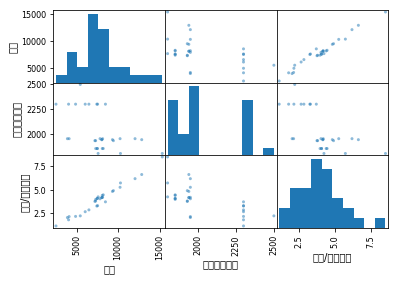

In [95]:
_ = scatter_matrix(df)

### データ変換

#### DataFrame.values属性
* DataFrameのカラムごとの値をnarrayとして出力する

In [96]:
df.loc[:, ["歩数", "摂取カロリー"]].values

array([[ 5439.,  2500.],
       [ 2510.,  2300.],
       [10238.,  1950.],
       [ 8209.,  1850.],
       [ 9434.,  1930.],
       [ 7593.,  1800.],
       [ 9320.,  1940.],
       [ 4873.,  2300.],
       [12045.,  1950.],
       [ 7493.,  1850.],
       [ 7289.,  1930.],
       [ 6481.,  2300.],
       [10287.,  1800.],
       [ 8043.,  1940.],
       [ 7435.,  2300.],
       [ 7529.,  2300.],
       [ 8031.,  1940.],
       [ 8475.,  2300.],
       [ 8132.,  1950.],
       [15328.,  1800.],
       [12849.,  1940.],
       [ 4029.,  2300.],
       [ 3890.,  1950.],
       [ 8093.,  1850.],
       [ 7823.,  1950.],
       [ 7492.,  1850.],
       [ 7203.,  1930.],
       [ 7302.,  1850.],
       [ 6033.,  2300.],
       [ 4093.,  1950.]])